# Your name: David (Jung Won) Yang

# Your netID: jwy273

## Problem 1 (20 points)

Problem 9.14.9 from Wasserstein.

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sb

def bootstrap_se(T,X,B):
    T_b = []
    means = []
    #T_b = np.array([])
    #means = np.array([])
    
    for i in range(B):
        sample = np.random.choice(X, size=len(X))
        x_bar = np.mean(sample)
        means.append(x_bar)
       
    T_b = T(means) #T(x) for every bootstrap mean.
    T_bar = np.mean(T_b)
    
    diff = [x - T_bar for x in T_b]
    v_boot = np.mean(np.power(diff  ,2))
    se_boot = np.sqrt(v_boot)
    return se_boot,T_b


In [430]:

#Z-score
alpha = .05
z_score = np.abs(stats.norm.ppf(alpha/2))


mu, sd, n = 5,1,100
obs = np.random.normal(mu,sd,n)
obsexp = np.exp(obs)

mu_hat = obs.mean()
#theta = np.exp(5)
theta_hat = np.exp(mu_hat)

#Boostrap
se_boot,x_boot = bootstrap_se(np.exp,obs,1000)

CI_boot = [theta_hat-z_score*se_boot, theta_hat+z_score*se_boot]

print(se_boot)
print(CI_boot)




13.0580413191
[109.36594745145459, 160.55252883944428]


In [431]:
#Parametric Bootstrap
#We use MLE of the mean for mu_hat, and the sd is known to be 1.
obs_hat = np.random.normal(mu_hat,sd,n)
se_pboot,x_pboot = bootstrap_se(np.exp,obs_hat,1000)
CI_pboot = [theta_hat-z_score*se_pboot, theta_hat+z_score*se_pboot]

print(se_pboot)
print(CI_pboot)

11.7108774271
[112.00634016093147, 157.91213612996739]


In [432]:
#Delta Method
se_delta = theta_hat / np.sqrt(n)
CI_delta = [theta_hat - z_score*se_delta, theta_hat + z_score*se_delta]

print(se_delta)
print(CI_delta)

13.4959238145
[108.50771353084491, 161.41076276005396]


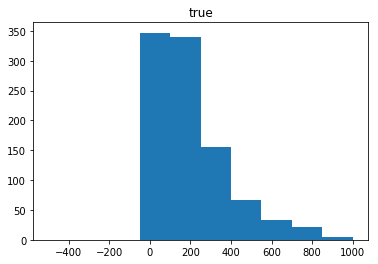

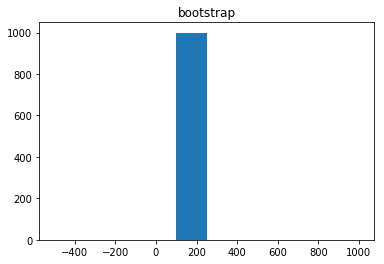

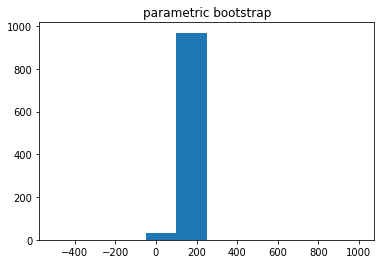

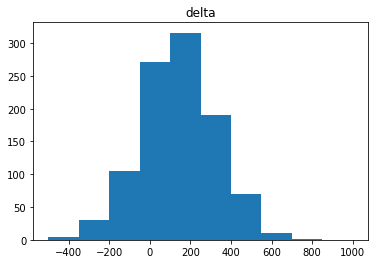

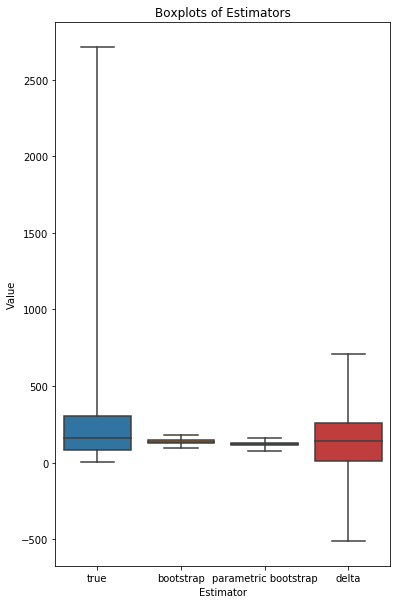

In [445]:
df_true = pd.DataFrame({'value': np.exp(np.random.normal(mu,sd,1000))})
df_true['variable'] = 'true'
df_true.head()

df_boot = pd.DataFrame({'value': x_boot})
df_boot['variable'] = 'bootstrap'
df_boot.head()

df_pboot = pd.DataFrame({'value': x_pboot})
df_pboot['variable'] = 'parametric bootstrap'
df_pboot.head()


df_delta = pd.DataFrame({'value': np.random.normal(theta_hat,np.power(se_delta,2),1000)})
df_delta['variable'] = 'delta'
df_delta.head()

plt.hist(df_true['value'],range=[-500,1000])
plt.title(df_true['variable'][0])
plt.show()

plt.hist(df_boot['value'],range=[-500,1000])
plt.title(df_boot['variable'][0])
plt.show()

plt.hist(df_pboot['value'],range=[-500,1000])
plt.title(df_pboot['variable'][0])
plt.show()

plt.hist(df_delta['value'],range=[-500,1000])
plt.title(df_delta['variable'][0])
plt.show()
#df = pd.concat((df_true, df_boot, df_pboot, df_delta))

fig, ax = plt.subplots(1, 1, figsize=(6, 10))
g = sb.boxplot('variable', 'value', data=df, ax=ax, whis=99999)
g.set(ylabel='Value', xlabel='Estimator', title='Boxplots of Estimators')
plt.show()

In [ ]:
#None of the approximations are very close to the true distribution. However, if one had to be chosen it would be the 
#delta method. The issue with the delta method is that is takes negative values because we are assuming the distibution 
#is normal. However, if we only consider the positive part of the distribution, the shape is some what similar to the
#simulation. 

## Problem 2 (40 points)

This problem was adapted from a homework assignment for the course Math 225, Introduction to Biostatistics by Brett Larget at Duquesne University.

Load the dataset harvest.txt into a dataframe and make sure that you have the right column labels. Throughout the problem, make sure that you treat the missing values appropriately (e.g. you can discard entries with missing values or fill them in with the average of the non-missing values, etc., whichever is more appropriate.)

Use hypothesis testing and some reasoning to answer the following questions:

### Part (a) (10 points)
Is there a difference between the diastolic blood pressures as measured at the clinic at baseline between smokers and nonsmokers? This data is in the variable DBPCB with grouping variable SMOKEYES. Find a 95% confidence interval for the difference and report a p-value for the two-sided hypothesis test with null hypothesis that the population means are equal.

Which interpretation is most appropriate?
>A. There is convincing evidence that the mean diastolic blood pressure of smokers is different than that of nonsmokers.

>B. There is fairly strong evidence that the mean diastolic blood pressure of smokers is different than that of nonsmokers.

> C. There is fairly strong evidence that the mean diastolic blood pressure of smokers is exactly equal to that of nonsmokers.

> D. The data is consistent with no difference in the mean diastolic blood pressure of smokers and nonsmokers. The observed difference in sample means can be explained by sample variation.

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def est_var(x,x_bar):
    varx_hat = np.mean(np.power( x - x_bar ,2))
    var_hat = varx_hat/len(x)
    return var_hat

datadir = '/Users/david/Desktop/'
data = pd.read_csv(datadir + 'harvest.txt', header=None, sep='\s+')
data.columns = data.iloc[0]
data = data[1:]

DBPCB = data.DBPCB.astype(np.float)
x0 = DBPCB[data.SMOKEYES == 'nonsmoker'] #SBPCB of non smokers.
x1 = DBPCB[data.SMOKEYES == 'smoker'] #SBPCB of smokers.

#x0_bar = np.sum(np.where(data.SMOKEYES == 'nonsmoker', SBPCB,0.0))/len(x0)
#x1_bar = np.sum(np.where(data.SMOKEYES == 'smoker', SBPCB,0.0))/len(x1)
x0_bar = np.mean(x0)
x1_bar = np.mean(x1)

var0 = est_var(x0,x0_bar) 
var1 = est_var(x1,x1_bar)
#se_x0 = np.std(x0)
#se_x1 = np.std(x1)

se_hat = np.sqrt(var0 + var1) #Estimate standard error.
#se_hat = np.sqrt((se_x0)**2/len(x0) + (se_x1)**2/len(x1))

mu_hat = x0_bar-x1_bar

#Calculate Confidence interval.
z = stats.norm.ppf(.975)
CI = [mu_hat-z*se_hat, mu_hat+z*se_hat]
print(CI)

#Reject H0 where |W|>z_alpha/2
W = np.abs(mu_hat/se_hat)
p_value = 2*stats.norm.cdf(-W)
print(p_value)

#Our cut off to reject the null hypothesis is a p-value of .05. 
print("I think interpretation D is most appropriate.")

[-0.30771944506947302, 1.3588733848321009]
0.216388287252
I think interpretation D is most appropriate.


### Part (b) (10 points)

Is there a difference between the heart rates at baseline between smokers and nonsmokers? Find a 95% confidence interval for the difference and report a p-value for the two-sided hypothesis test with null hypothesis that the population means are equal.

Which interpretation is most appropriate?
> A. There is convincing evidence that the mean heart rate of smokers is different than that of nonsmokers.

> B. There is fairly strong evidence that the mean heart rate of smokers is different than that of nonsmokers.

> C. There is fairly strong evidence that the mean heart rate of smokers is exactly equal to that of nonsmokers.

> D. The data is consistent with no difference in the mean heart rate of smokers and nonsmokers. The observed difference in sample means can be explained by sample variation.

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def est_var(x,x_bar):
    varx_hat = np.mean(np.power( x - x_bar ,2))
    var_hat = varx_hat/len(x)
    return var_hat

datadir = '/Users/david/Desktop/'
data = pd.read_csv(datadir + 'harvest.txt', header=None, sep='\s+')
data.columns = data.iloc[0]
data = data[1:]

HRAB = data.HRAB.astype(np.float)

x0 = HRAB[data.SMOKEYES == 'nonsmoker'] #SBPCB of non smokers.
x1 = HRAB[data.SMOKEYES == 'smoker'] #SBPCB of smokers.

#x0_bar = np.sum(np.where(data.SMOKEYES == 'nonsmoker', SBPCB,0.0))/len(x0)
#x1_bar = np.sum(np.where(data.SMOKEYES == 'smoker', SBPCB,0.0))/len(x1)
x0_bar = np.mean(x0)
x1_bar = np.mean(x1)

np.shape(x0-x0_bar)
var0 = est_var(x0,x0_bar) 
var1 = est_var(x1,x1_bar)

se_hat = np.sqrt(var0 + var1) #Estimate standard error.
mu_hat = x0_bar-x1_bar

#Calculate Confidence interval.
z = stats.norm.ppf(.975)
CI = [mu_hat-z*se_hat, mu_hat+z*se_hat]
print(CI)

#Reject H0 where |W|>z_alpha/2
W = np.abs(mu_hat/se_hat)
p_value = 2*stats.norm.cdf(-W)
print(p_value)

#Our cut off to reject the null hypothesis is a p-value of .05. 
print("I think interpretation D is most appropriate.")

[-1.5246429966065957, 0.90543642526510237]
0.61748576016
I think interpretation D is most appropriate.


### Part (c) (10 points)

Are measurements at baseline of diastolic blood pressure similar if they are made at the clinic or at home? These data are in the variables DBPCB and DBPAB. Find a 95% confidence interval for the difference and report a p-value for the two-sided hypothesis test with null hypothesis that the population means are equal.

Which interpretation is most appropriate?
> A. There is convincing evidence that the measurements of diastolic blood pressure at home and at the clinic are different.

> B. There is fairly strong evidence that the measurements of diastolic blood pressure at home and at the clinic are different.

> C. There is fairly strong evidence evidence that the measurements of diastolic blood pressure at home and at the clinic are exactly the same.

> D. The data is consistent with no difference in the measurements of diastolic blood pressure at home and at the clinic. The observed differences can be explained by sample variation.

### Part (d) (10 points)

Are measurements at baseline of heart rate similar if they are made at the clinic or at home? These data are in the variables HRCB and HRAB. Find a 95% confidence interval for the difference and report a p-value for the two-sided hypothesis test with null hypothesis that the population means are equal.

Which interpretation is most appropriate?

> A. There is convincing evidence that the measurements of heart rate at home and at the clinic are different.

> B. There is fairly strong evidence that the measurements of heart rate at home and at the clinic are different.

> C. There is fairly strong evidence evidence that the measurements of heart rate at home and at the clinic are exactly the same.

> D. The data is consistent with no difference in the measurements of heart rate at home and at the clinic. The observed differences can be explained by sample variation.

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def est_var(x,x_bar):
    varx_hat = np.mean(np.power( x - x_bar ,2))
    var_hat = varx_hat/len(x)
    return var_hat

datadir = '/Users/david/Desktop/'
data = pd.read_csv(datadir + 'harvest.txt', header=None, sep='\s+')
data.columns = data.iloc[0]
data = data[1:]

DBPCB = data.DBPCB.astype(np.float)
DBPAB = data.DBPAB.astype(np.float)

x0 = DBPCB
x1 = DBPAB

x0_bar = np.mean(x0)
x1_bar = np.mean(x1)


var0 = est_var(x0,x0_bar) 
var1 = est_var(x1,x1_bar)

se_hat = np.sqrt(var0 + var1) #Estimate standard error.
mu_hat = x0_bar-x1_bar

#Calculate Confidence interval.
z = stats.norm.ppf(.975)
CI = [mu_hat-z*se_hat, mu_hat+z*se_hat]
print(CI)

#Reject H0 where |W|>z_alpha/2
W = np.abs(mu_hat/se_hat)
p_value = 2*stats.norm.cdf(-W)
print(p_value)

#Our cut off to reject the null hypothesis is a p-value of .05. 
print("I think interpretation A is most appropriate.")

[11.884368136564758, 13.066757206527813]
0.0
I think interpretation A is most appropriate.


In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def est_var(x,x_bar):
    varx_hat = np.mean(np.power( x - x_bar ,2))
    var_hat = varx_hat/len(x)
    return var_hat

datadir = '/Users/david/Desktop/'
data = pd.read_csv(datadir + 'harvest.txt', header=None, sep='\s+')
data.columns = data.iloc[0]
data = data[1:]

HRCB = data.HRCB.astype(np.float)
HRAB = data.HRAB.astype(np.float)

x0 = HRCB
x1 = HRAB

x0_bar = np.mean(x0)
x1_bar = np.mean(x1)

var0 = est_var(x0,x0_bar) 
var1 = est_var(x1,x1_bar)

se_hat = np.sqrt(var0 + var1) #Estimate standard error.
mu_hat = x0_bar-x1_bar

#Calculate Confidence interval.
z = stats.norm.ppf(.975)
CI = [mu_hat-z*se_hat, mu_hat+z*se_hat]
print(CI)

#Reject H0 where |W|>z_alpha/2
W = np.abs(mu_hat/se_hat)
p_value = 2*stats.norm.cdf(-W)
print(p_value)

#Our cut off to reject the null hypothesis is a p-value of .05. 
print("I think interpretation A is most appropriate.")

[1.3193387601906639, 2.8106703889403204]
5.70487673341e-08
I think interpretation A is most appropriate.


## Problem 3 (Extra Credit, 20 points)

Combine all the above tests into a single test using $(1)$ the Bonferroni method; $(2)$ The Benjamini-Hochberg method.